# **Reading The DataSet**

In [3]:
import pandas as pd

# Load the dataset to understand its structure
file_path = "test.xlsx"
df = pd.read_excel(file_path)

# Show the first few rows and the column names for understanding
df.head(), df.columns

(                                        Subject  \
 0                          EnronOptions Update!   
 1                                  (No Subject)   
 2  Phone Screen  Interview - Shannon L. Burnham   
 3                         RE: My new work email   
 4                                           Bet   
 
                                                 body       date  \
 0  EnronOptions Announcement\n\n\nWe have updated... 2010-05-10   
 1  Marc,\n\nUnfortunately, today is not going to ... 2010-07-29   
 2  When: Wednesday, June 06, 2001 10:00 AM-11:00 ... 2011-07-25   
 3  we were thinking papasitos (we can meet somewh... 2010-03-25   
 4  Since you never gave me the $20 for the last t... 2011-05-21   
 
                       from  
 0     sally.beck@enron.com  
 1      eric.bass@enron.com  
 2     sally.beck@enron.com  
 3  johnny.palmer@enron.com  
 4  lydia.delgado@enron.com  ,
 Index(['Subject', 'body', 'date', 'from'], dtype='object'))

# **Sentiment Labeling**

In [4]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Download VADER if not already downloaded
nltk.download("vader_lexicon")

# Initialize VADER
sia = SentimentIntensityAnalyzer()

# Define a function to label sentiment based on VADER scores
def get_sentiment(text):
    scores = sia.polarity_scores(text)
    compound = scores['compound']
    if compound >= 0.05:
        return 'Positive'
    elif compound <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment labeling
df['sentiment'] = df['body'].astype(str).apply(get_sentiment)
df[['body', 'sentiment']].head()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,body,sentiment
0,EnronOptions Announcement\n\n\nWe have updated...,Positive
1,"Marc,\n\nUnfortunately, today is not going to ...",Positive
2,"When: Wednesday, June 06, 2001 10:00 AM-11:00 ...",Neutral
3,we were thinking papasitos (we can meet somewh...,Neutral
4,Since you never gave me the $20 for the last t...,Positive


# **Exploratory Data Analysis**

  **Basic Info and Null Values**

In [5]:
# Shape and column info
print("Dataset shape:", df.shape)
print("\nColumns:\n", df.columns)
print("\nMissing values:\n", df.isnull().sum())
df.info()


Dataset shape: (2191, 5)

Columns:
 Index(['Subject', 'body', 'date', 'from', 'sentiment'], dtype='object')

Missing values:
 Subject      0
body         0
date         0
from         0
sentiment    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2191 entries, 0 to 2190
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Subject    2191 non-null   object        
 1   body       2191 non-null   object        
 2   date       2191 non-null   datetime64[ns]
 3   from       2191 non-null   object        
 4   sentiment  2191 non-null   object        
dtypes: datetime64[ns](1), object(4)
memory usage: 85.7+ KB


**Sentiment Label Distribution**

/tmp/ipython-input-1474706504.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', palette='Set2')


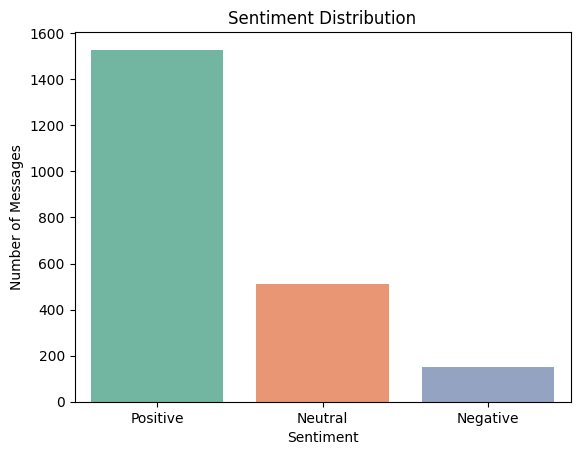

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sentiment distribution barplot
sns.countplot(data=df, x='sentiment', palette='Set2')
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Messages")
plt.show()


In [7]:
# Ensure 'body' column is string and calculate message length
df['body'] = df['body'].astype(str)
df['message_length'] = df['body'].apply(len)


 **Message Length Distribution**

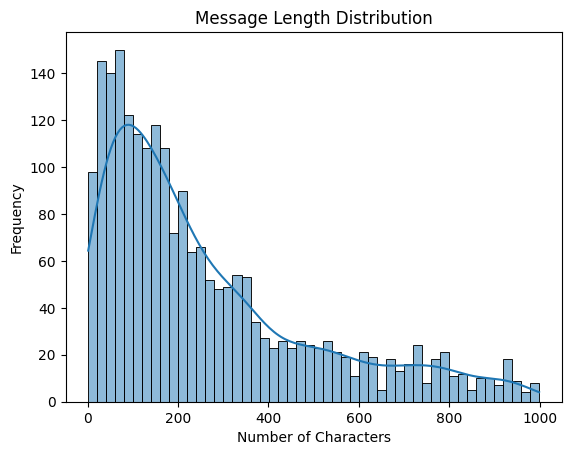

In [8]:
# Distribution of message lengths
sns.histplot(df['message_length'], bins=50, kde=True)
plt.title("Message Length Distribution")
plt.xlabel("Number of Characters")
plt.ylabel("Frequency")
plt.show()


**Top 10 Frequent Email Senders**

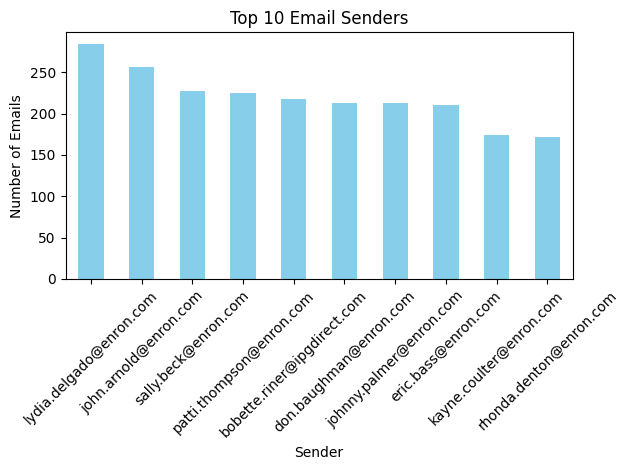

In [9]:
# Top 10 employees by email count
top_senders = df['from'].value_counts().head(10)
top_senders.plot(kind='bar', color='skyblue')
plt.title("Top 10 Email Senders")
plt.xlabel("Sender")
plt.ylabel("Number of Emails")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


 **Emails Over Time (Monthly Trend)**

/tmp/ipython-input-55438952.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_counts = df.set_index('date').resample('M')['body'].count()


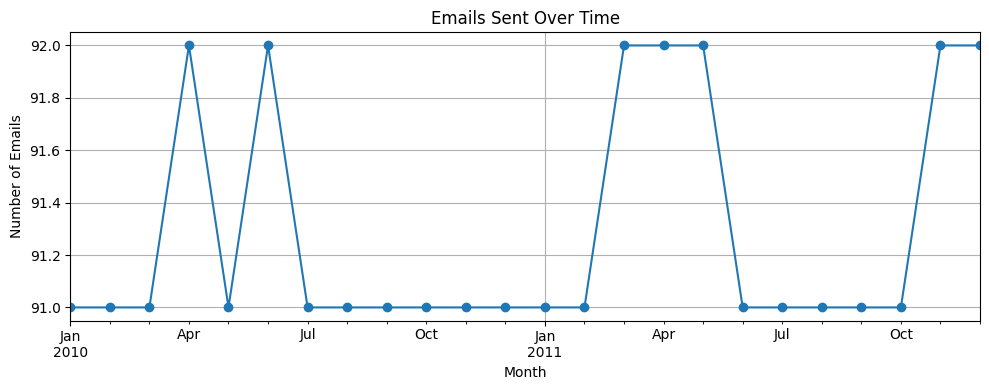

In [10]:
# Convert to datetime if not already done
df['date'] = pd.to_datetime(df['date'])

# Emails per month
monthly_counts = df.set_index('date').resample('M')['body'].count()
monthly_counts.plot(figsize=(10, 4), marker='o')
plt.title("Emails Sent Over Time")
plt.xlabel("Month")
plt.ylabel("Number of Emails")
plt.grid(True)
plt.tight_layout()
plt.show()


**Sentiment Trends Over Time**

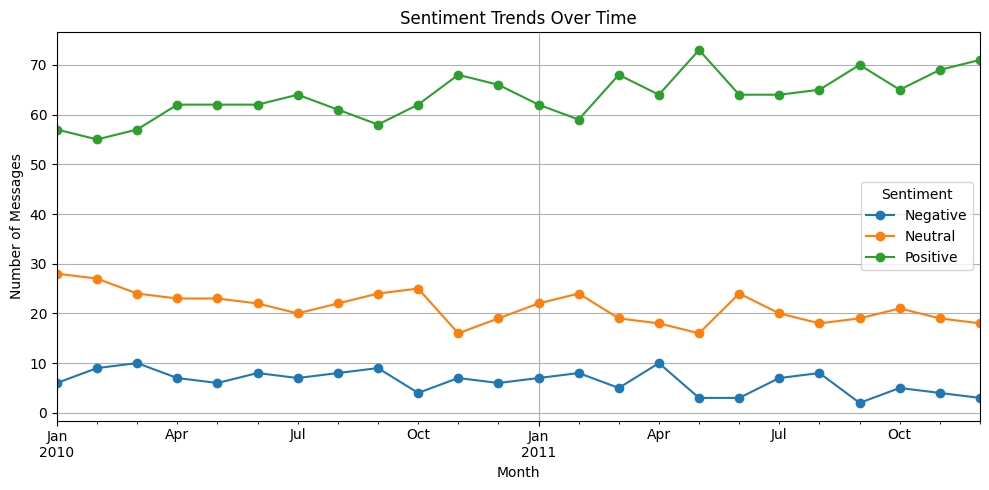

In [11]:
# Sentiment trends over time
sentiment_over_time = df.groupby([df['date'].dt.to_period('M'), 'sentiment'])['body'].count().unstack().fillna(0)
sentiment_over_time.plot(figsize=(10, 5), marker='o')
plt.title("Sentiment Trends Over Time")
plt.xlabel("Month")
plt.ylabel("Number of Messages")
plt.legend(title='Sentiment')
plt.grid(True)
plt.tight_layout()
plt.show()


**Average Message Length by Sentiment**

/tmp/ipython-input-2964903677.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='sentiment', y='message_length', palette='pastel')


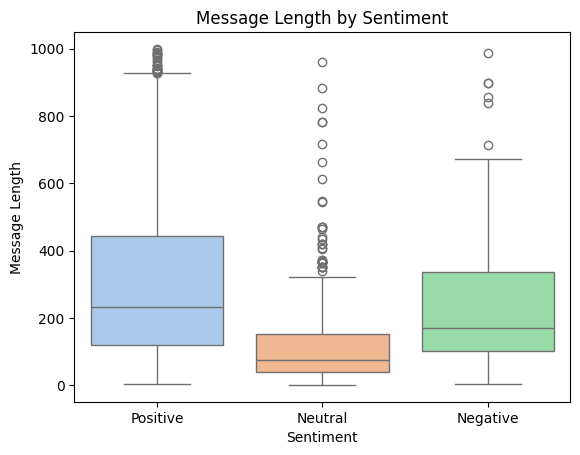

In [12]:
# Compare message length by sentiment
sns.boxplot(data=df, x='sentiment', y='message_length', palette='pastel')
plt.title("Message Length by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Message Length")
plt.show()


# **Monthly Sentiment Score Calculation**

In [13]:
# Convert date and sentiment score
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.to_period('M')

# Map sentiment to score
score_map = {'Positive': 1, 'Negative': -1, 'Neutral': 0}
df['score'] = df['sentiment'].map(score_map)


In [14]:
# Group by sender and month to calculate monthly sentiment score
monthly_scores = df.groupby(['from', 'month'])['score'].sum().reset_index()

# Preview
monthly_scores.rename(columns={'from': 'employee'}, inplace=True)
monthly_scores.head()


,employee,month,score
0,bobette.riner@ipgdirect.com,2010-01,1
1,bobette.riner@ipgdirect.com,2010-02,7
2,bobette.riner@ipgdirect.com,2010-03,6
3,bobette.riner@ipgdirect.com,2010-04,3
4,bobette.riner@ipgdirect.com,2010-05,2


In [15]:
# Group by sender and month to calculate total sentiment score
monthly_scores = df.groupby(['from', df['date'].dt.to_period('M')])['score'].sum().reset_index()
monthly_scores.columns = ['employee', 'month', 'monthly_score']


# **Employee Ranking**

In [16]:
# Group by sender and month to calculate total sentiment score
monthly_scores = df.groupby(['from', df['date'].dt.to_period('M')])['score'].sum().reset_index()
monthly_scores.columns = ['employee', 'month', 'monthly_score']


In [17]:
# Function to rank employees by sentiment score for a given month
def rank_employees_by_month(month_period):
    month_data = monthly_scores[monthly_scores['month'] == month_period]

    # Sort by score and then alphabetically
    top_positive = month_data.sort_values(by=['monthly_score', 'employee'], ascending=[False, True]).head(3)
    top_negative = month_data.sort_values(by=['monthly_score', 'employee'], ascending=[True, True]).head(3)

    return top_positive, top_negative

# Example usage: rank employees for July 2001
month_to_check = '2001-07'
top_pos, top_neg = rank_employees_by_month(month_to_check)

print(f"Top 3 Positive Employees in {month_to_check}:\n", top_pos)
print(f"\nTop 3 Negative Employees in {month_to_check}:\n", top_neg)


Top 3 Positive Employees in 2001-07:
 Empty DataFrame
Columns: [employee, month, monthly_score]
Index: []

Top 3 Negative Employees in 2001-07:
 Empty DataFrame
Columns: [employee, month, monthly_score]
Index: []


In [18]:
# Get all months with messages
df['month'] = df['date'].dt.to_period('M')
print("Available months in dataset:")
print(df['month'].value_counts().sort_index())


Available months in dataset:
month
2010-01    91
2010-02    91
2010-03    91
2010-04    92
2010-05    91
2010-06    92
2010-07    91
2010-08    91
2010-09    91
2010-10    91
2010-11    91
2010-12    91
2011-01    91
2011-02    91
2011-03    92
2011-04    92
2011-05    92
2011-06    91
2011-07    91
2011-08    91
2011-09    91
2011-10    91
2011-11    92
2011-12    92
Freq: M, Name: count, dtype: int64


In [19]:
month_to_check = '2010-05'  # Replace with a month that exists
top_pos, top_neg = rank_employees_by_month(month_to_check)

print(f"Top 3 Positive Employees in {month_to_check}:\n", top_pos)
print(f"\nTop 3 Negative Employees in {month_to_check}:\n", top_neg)


Top 3 Positive Employees in 2010-05:
                      employee    month  monthly_score
28     don.baughman@enron.com  2010-05             16
172  patti.thompson@enron.com  2010-05              9
52        eric.bass@enron.com  2010-05              6

Top 3 Negative Employees in 2010-05:
                         employee    month  monthly_score
100      johnny.palmer@enron.com  2010-05              1
4    bobette.riner@ipgdirect.com  2010-05              2
76         john.arnold@enron.com  2010-05              3


# **Heat Map**

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


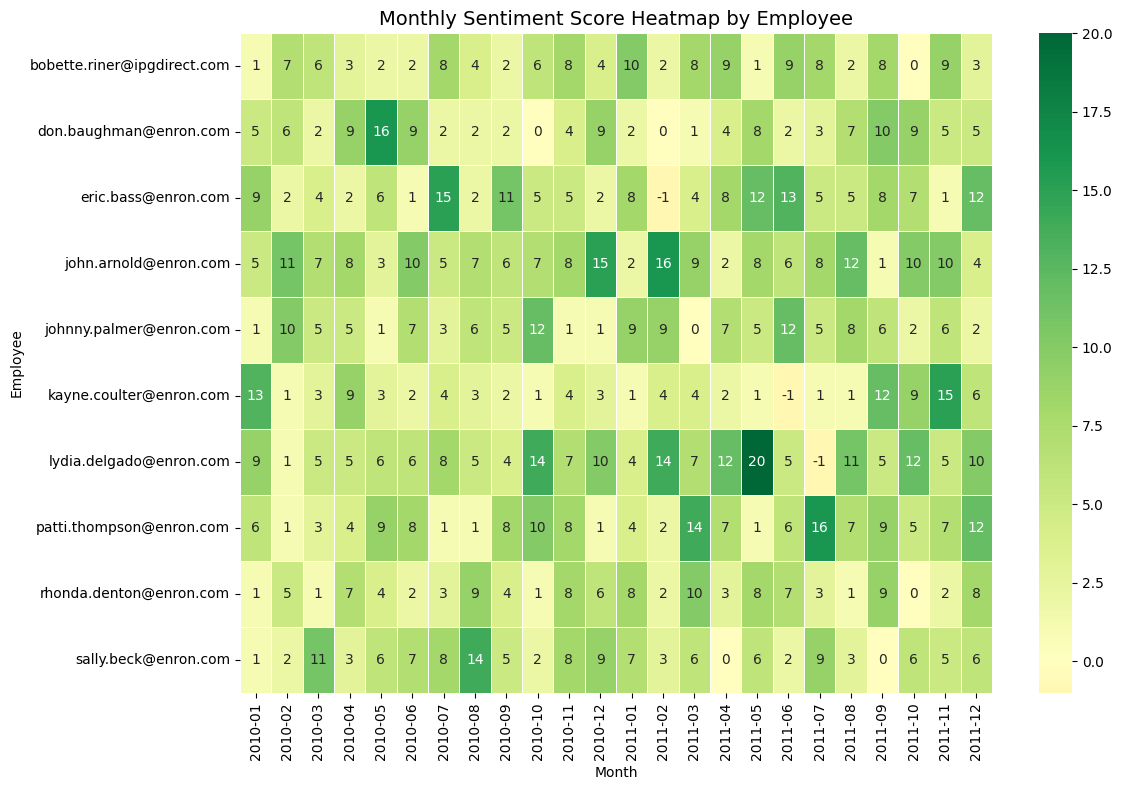

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

# Download VADER lexicon
nltk.download('vader_lexicon')

# Load dataset
df = pd.read_excel("test.xlsx")

# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Sentiment analysis
sia = SentimentIntensityAnalyzer()
df['sentiment_score'] = df['body'].astype(str).apply(lambda x: sia.polarity_scores(x)['compound'])

# Classify sentiment
df['sentiment'] = df['sentiment_score'].apply(lambda x: 'positive' if x > 0.05
                                              else 'negative' if x < -0.05
                                              else 'neutral')

# Map to numeric score
df['score'] = df['sentiment'].map({'positive': 1, 'negative': -1, 'neutral': 0})

# Create month column
df['month'] = df['date'].dt.to_period('M')

# Aggregate monthly sentiment per employee
monthly_scores = df.groupby(['from', 'month'])['score'].sum().unstack(fill_value=0)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(monthly_scores, cmap="RdYlGn", center=0, annot=True, fmt="d", linewidths=.5)
plt.title("Monthly Sentiment Score Heatmap by Employee", fontsize=14)
plt.ylabel("Employee")
plt.xlabel("Month")
plt.tight_layout()
plt.show()


In [20]:
# Ensure date is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Filter negative emails only
negatives = df[df['sentiment'] == 'Negative'].copy()


# **Flight Risk Identification**

In [21]:
# Initialize flight risk list
flight_risks = set()

# Iterate through each employee's messages
for emp, group in negatives.groupby('from'):
    dates = group['date'].sort_values().reset_index(drop=True)

    # Sliding window over sorted dates
    for i in range(len(dates)):
        count_in_window = 1
        for j in range(i + 1, len(dates)):
            if (dates[j] - dates[i]).days <= 30:
                count_in_window += 1
            else:
                break
        if count_in_window >= 4:
            flight_risks.add(emp)
            break  # No need to check further once risk is confirmed


In [22]:
print("Flight Risk Employees (4+ negative mails in any 30-day window):\n")
for emp in flight_risks:
    print(emp)


Flight Risk Employees (4+ negative mails in any 30-day window):

johnny.palmer@enron.com
sally.beck@enron.com
don.baughman@enron.com
bobette.riner@ipgdirect.com


# **Predictive Modeling**

In [23]:
# Ensure helper columns exist
df['message_length'] = df['body'].astype(str).apply(len)
df['month'] = df['date'].dt.to_period('M')
score_map = {'Positive': 1, 'Negative': -1, 'Neutral': 0}
df['score'] = df['sentiment'].map(score_map)

# Group and aggregate features
monthly_features = df.groupby(['from', 'month']).agg({
    'body': 'count',                     # number of messages
    'message_length': ['sum', 'mean'],  # total and average message length
    'score': 'sum'                      # target variable
}).reset_index()

# Rename columns
monthly_features.columns = ['employee', 'month', 'msg_count', 'total_length', 'avg_length', 'monthly_score']


In [24]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = monthly_features[['msg_count', 'total_length', 'avg_length']]
y = monthly_features['monthly_score']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
from sklearn.linear_model import LinearRegression

# Initialize and fit model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [26]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on test set
y_pred = model.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("📊 Model Performance:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")


📊 Model Performance:
Mean Squared Error (MSE): 3.39
R² Score: 0.72
